In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta
import pickle

In [ ]:
data= "/content/drive/MyDrive/CO_CO2.dataset.csv"
df = pd.read_csv(data)

In [ ]:
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])
df['DATE_TIME'] = df['DATE_TIME'].apply(lambda x: x.timestamp())

In [ ]:
# Define a list of hours for which you want to calculate the ratios
hours_to_calculate = [1, 2, 3, 4]

In [ ]:
# Create new columns for each time interval
for hours in hours_to_calculate:
    column_name = f'CO/CO2_RATIO_AFTER_{hours}_HOURS'
    # Calculate the shift index
    shift_index = -int(hours)
    # Calculate the ratio and assign it to the new column
    df[column_name] = df.apply(lambda row: row['CO'] / df['CO2'].shift(shift_index).iloc[row.name], axis=1)

In [ ]:
df

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,TOP_PRESS_1,CO,CO2,H2,SKIN_TEMP_AVG,CO/CO2 Ratio,CO/CO2_RATIO_AFTER_1_HOURS,CO/CO2_RATIO_AFTER_2_HOURS,CO/CO2_RATIO_AFTER_3_HOURS,CO/CO2_RATIO_AFTER_4_HOURS
0,1.609978e+09,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,...,2.0,22.22,21.00,3.88,69.940478,1.058095,1.058095,1.054080,1.051585,1.043192
1,1.609979e+09,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,...,1.0,22.56,21.00,3.94,71.454476,1.074286,1.070209,1.067676,1.059155,1.069194
2,1.609979e+09,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,...,1.0,22.49,21.08,3.94,70.579462,1.066888,1.064363,1.055869,1.065877,1.070952
3,1.609980e+09,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,...,1.0,22.36,21.13,3.99,70.179791,1.058211,1.049765,1.059716,1.064762,1.059716
4,1.609981e+09,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,...,1.0,22.25,21.30,4.10,70.728470,1.044601,1.054502,1.059524,1.054502,1.049528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25400,1.640992e+09,278198.0,2.75,76.0,2.0,189.0,2.92,2.79,2628.0,22.25,...,1.0,21.90,20.25,3.10,65.923014,1.081481,1.087388,1.084158,1.080414,1.076167
25401,1.640993e+09,286486.0,2.80,77.0,1.0,190.0,2.97,2.84,2590.0,22.22,...,1.0,22.09,20.14,3.04,64.321354,1.096822,1.093564,1.089788,1.085504,NaN
25402,1.640993e+09,284500.0,2.81,77.0,0.0,191.0,2.98,2.85,2592.0,22.20,...,1.0,22.04,20.20,2.99,64.253390,1.091089,1.087321,1.083047,NaN,NaN
25403,1.640994e+09,284455.0,2.83,77.0,1.0,190.0,3.00,2.87,2582.0,22.21,...,1.0,22.03,20.27,3.09,63.478089,1.086828,1.082555,NaN,NaN,NaN


In [ ]:
df = df.fillna(df.median())

In [ ]:
df

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,TOP_PRESS_1,CO,CO2,H2,SKIN_TEMP_AVG,CO/CO2 Ratio,CO/CO2_RATIO_AFTER_1_HOURS,CO/CO2_RATIO_AFTER_2_HOURS,CO/CO2_RATIO_AFTER_3_HOURS,CO/CO2_RATIO_AFTER_4_HOURS
0,1.609978e+09,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,...,2.0,22.22,21.00,3.88,69.940478,1.058095,1.058095,1.054080,1.051585,1.043192
1,1.609979e+09,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,...,1.0,22.56,21.00,3.94,71.454476,1.074286,1.070209,1.067676,1.059155,1.069194
2,1.609979e+09,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,...,1.0,22.49,21.08,3.94,70.579462,1.066888,1.064363,1.055869,1.065877,1.070952
3,1.609980e+09,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,...,1.0,22.36,21.13,3.99,70.179791,1.058211,1.049765,1.059716,1.064762,1.059716
4,1.609981e+09,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,...,1.0,22.25,21.30,4.10,70.728470,1.044601,1.054502,1.059524,1.054502,1.049528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25400,1.640992e+09,278198.0,2.75,76.0,2.0,189.0,2.92,2.79,2628.0,22.25,...,1.0,21.90,20.25,3.10,65.923014,1.081481,1.087388,1.084158,1.080414,1.076167
25401,1.640993e+09,286486.0,2.80,77.0,1.0,190.0,2.97,2.84,2590.0,22.22,...,1.0,22.09,20.14,3.04,64.321354,1.096822,1.093564,1.089788,1.085504,1.084754
25402,1.640993e+09,284500.0,2.81,77.0,0.0,191.0,2.98,2.85,2592.0,22.20,...,1.0,22.04,20.20,2.99,64.253390,1.091089,1.087321,1.083047,1.084661,1.084754
25403,1.640994e+09,284455.0,2.83,77.0,1.0,190.0,3.00,2.87,2582.0,22.21,...,1.0,22.03,20.27,3.09,63.478089,1.086828,1.082555,1.084836,1.084661,1.084754


In [ ]:
X = df[['DATE_TIME', 'CB_FLOW', 'CB_PRESS', 'CB_TEMP', 'STEAM_FLOW', 'STEAM_TEMP', 'STEAM_PRESS','O2_PRESS', 'O2_FLOW', 'O2_PER', 'PCI', 'ATM_HUMID', 'HB_TEMP', 'HB_PRESS', 'TOP_PRESS','TOP_TEMP1', 'TOP_SPRAY', 'TOP_TEMP', 'TOP_PRESS_1', 'H2', 'CO', 'CO2']]
y = df[['CO/CO2 Ratio','CO/CO2_RATIO_AFTER_1_HOURS','CO/CO2_RATIO_AFTER_2_HOURS','CO/CO2_RATIO_AFTER_3_HOURS','CO/CO2_RATIO_AFTER_4_HOURS']]

In [ ]:
y

,CO/CO2 Ratio,CO/CO2_RATIO_AFTER_1_HOURS,CO/CO2_RATIO_AFTER_2_HOURS,CO/CO2_RATIO_AFTER_3_HOURS,CO/CO2_RATIO_AFTER_4_HOURS
0,1.058095,1.058095,1.054080,1.051585,1.043192
1,1.074286,1.070209,1.067676,1.059155,1.069194
2,1.066888,1.064363,1.055869,1.065877,1.070952
3,1.058211,1.049765,1.059716,1.064762,1.059716
4,1.044601,1.054502,1.059524,1.054502,1.049528
...,...,...,...,...,...
25400,1.081481,1.087388,1.084158,1.080414,1.076167
25401,1.096822,1.093564,1.089788,1.085504,1.084754
25402,1.091089,1.087321,1.083047,1.084661,1.084754
25403,1.086828,1.082555,1.084836,1.084661,1.084754


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models=[]
for i in range(5):
  model = RandomForestRegressor(n_estimators=100, random_state=42)
  model.fit(X_train, y_train.iloc[:,i])
  models.append(model)

In [ ]:
predictions = []
for i in range(5):
    y_pred = models[i].predict(X_test)
    predictions.append(y_pred)

In [ ]:
y_test

,CO/CO2 Ratio,CO/CO2_RATIO_AFTER_1_HOURS,CO/CO2_RATIO_AFTER_2_HOURS,CO/CO2_RATIO_AFTER_3_HOURS,CO/CO2_RATIO_AFTER_4_HOURS
20651,1.084200,1.077794,1.071464,1.064171,1.066764
7850,1.144993,1.150150,1.146135,1.139881,1.133695
5117,1.270601,1.265890,1.259884,1.248694,1.258557
21213,1.073983,1.078740,1.078740,1.078210,1.085149
1818,1.050580,1.054004,1.055970,1.054986,1.048148
...,...,...,...,...,...
7721,1.366365,1.357907,1.355618,1.335362,1.345039
20625,1.038127,1.051320,1.052348,1.055447,1.052348
4585,1.112833,1.106936,1.113372,1.121523,1.119883
21235,1.071775,1.076998,1.074903,1.080156,1.075949


In [ ]:
accuracy_values = []
mse_values = []
for i in range(5):
  mse = mean_squared_error(y_test.iloc[:,i], predictions[i])
  mse_values.append(mse)
  print(y_test.iloc[:,i])
  print(predictions[i])
  print(f"Mean Squared Error: {mse}")
  accuracy= 1- mse
  print(f"Accuracy: {accuracy}")
  accuracy_values.append(accuracy)

20651    1.084200
7850     1.144993
5117     1.270601
21213    1.073983
1818     1.050580
           ...   
7721     1.366365
20625    1.038127
4585     1.112833
21235    1.071775
10342    1.046104
Name: CO/CO2 Ratio, Length: 5081, dtype: float64
[1.08429645 1.14472837 1.27086701 ... 1.11227999 1.07172374 1.04586751]
Mean Squared Error: 0.00031229147267567103
Accuracy: 0.9996877085273244
20651    1.077794
7850     1.150150
5117     1.265890
21213    1.078740
1818     1.054004
           ...   
7721     1.357907
20625    1.051320
4585     1.106936
21235    1.076998
10342    1.042739
Name: CO/CO2_RATIO_AFTER_1_HOURS, Length: 5081, dtype: float64
[1.08013926 1.14434635 1.26039645 ... 1.11136107 1.07136356 1.04702652]
Mean Squared Error: 0.001284295189748766
Accuracy: 0.9987157048102512
20651    1.071464
7850     1.146135
5117     1.259884
21213    1.078740
1818     1.055970
           ...   
7721     1.355618
20625    1.052348
4585     1.113372
21235    1.074903
10342    1.047553
Name: CO

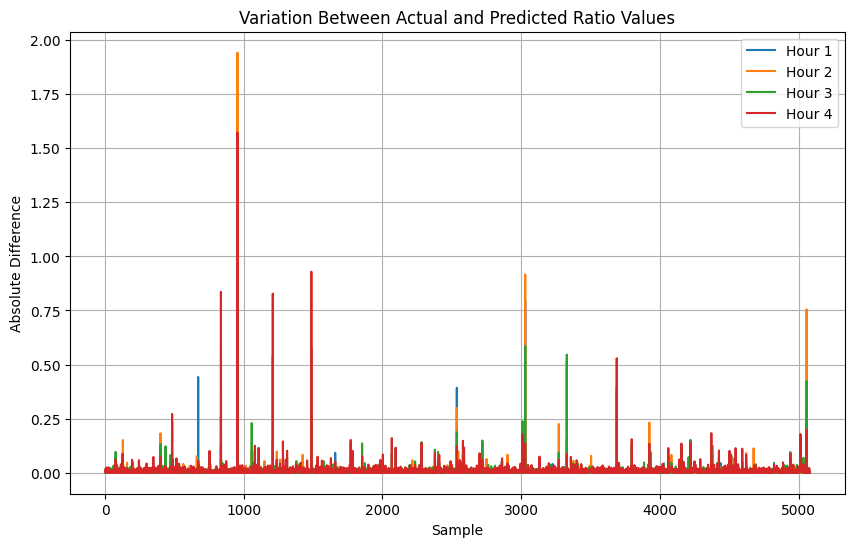

In [ ]:
absolute_difference_values = []
for i in range(5):
    absolute_difference = np.abs(y_test.iloc[:, i] - predictions[i])
    absolute_difference_values.append(absolute_difference)

# Create a line plot to visualize the variation in the absolute difference values
plt.figure(figsize=(10, 6))
hours_range = np.arange(1, y_test.shape[0]+1)  # Adjust the range based on the shape of y_test
for i in range(4):
    plt.plot(hours_range, absolute_difference_values[i], label=f"Hour {i+1}")

plt.xlabel('Sample')
plt.ylabel('Absolute Difference')
plt.title('Variation Between Actual and Predicted Ratio Values')
plt.legend()
plt.grid(True)

# Save the plot to a file
plt.savefig('variation_plot.png')

# Display the plot
plt.show()

In [ ]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [ ]:
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [ ]:
from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>